<a href="https://colab.research.google.com/github/vvijaykar/housing_project/blob/main/Housing_MiniModel_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import io, sys

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving train.csv to train.csv


In [ ]:
housing = pd.read_csv(io.BytesIO(uploaded['train.csv'])).fillna(0)
D_housing = pd.get_dummies(housing)
housing.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,0,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,0,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,0,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,0,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,0,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,0,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,0,0,0,12,2008,WD,Normal,250000


In [ ]:
D_housing.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,MSZoning_C (all),MSZoning_FV,...,GarageQual_Po,GarageQual_TA,GarageCond_0,GarageCond_Ex,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,PavedDrive_N,PavedDrive_P,PavedDrive_Y,PoolQC_0,PoolQC_Ex,PoolQC_Fa,PoolQC_Gd,Fence_0,Fence_GdPrv,Fence_GdWo,Fence_MnPrv,Fence_MnWw,MiscFeature_0,MiscFeature_Gar2,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,208500,0,0,...,0,1,0,0,0,0,0,1,0,0,1,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,181500,0,0,...,0,1,0,0,0,0,0,1,0,0,1,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,223500,0,0,...,0,1,0,0,0,0,0,1,0,0,1,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006,140000,0,0,...,0,1,0,0,0,0,0,1,0,0,1,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008,250000,0,0,...,0,1,0,0,0,0,0,1,0,0,1,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0


In [ ]:
corr_data = pd.DataFrame(housing.corr(method='pearson',min_periods=1)['SalePrice']).sort_values(by='SalePrice',ascending=False).reset_index()
corr_data[1:20]

,index,SalePrice
1,OverallQual,0.790982
2,GrLivArea,0.708624
3,GarageCars,0.640409
4,GarageArea,0.623431
5,TotalBsmtSF,0.613581
6,1stFlrSF,0.605852
7,FullBath,0.560664
8,TotRmsAbvGrd,0.533723
9,YearBuilt,0.522897
10,YearRemodAdd,0.507101


In [ ]:
corr_data_D = pd.DataFrame(D_housing.corr(method='pearson',min_periods=1)['SalePrice']).sort_values(by='SalePrice',ascending=False).reset_index()
corr_data_D[1:15]

,index,SalePrice
1,OverallQual,0.790982
2,GrLivArea,0.708624
3,GarageCars,0.640409
4,GarageArea,0.623431
5,TotalBsmtSF,0.613581
6,1stFlrSF,0.605852
7,FullBath,0.560664
8,BsmtQual_Ex,0.553105
9,TotRmsAbvGrd,0.533723
10,YearBuilt,0.522897


In [ ]:
housing.columns
miniMod = corr_data['index'][0:6].to_list()
miniMod.append('Neighborhood')
miniMod.append('KitchenQual')
miniMod

['SalePrice',
 'OverallQual',
 'GrLivArea',
 'GarageCars',
 'GarageArea',
 'TotalBsmtSF',
 'Neighborhood',
 'KitchenQual']

In [ ]:
housing_mini = housing[miniMod]
homes = pd.get_dummies(housing_mini)
homes.head()

,SalePrice,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA
0,208500,7,1710,2,548,856,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,181500,6,1262,2,460,1262,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
2,223500,7,1786,2,608,920,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,140000,7,1717,3,642,756,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,250000,8,2198,3,836,1145,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0


In [ ]:
y = homes['SalePrice'].values.reshape(-1, 1)
X = homes.drop('SalePrice', axis=1)
print(X.shape, y.shape)

(1460, 34) (1460, 1)


In [ ]:
# Split the data into training and testing

### BEGIN SOLUTION
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
### END SOLUTION

In [ ]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScater model and fit it to the training data

### BEGIN SOLUTION
X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)
### END SOLUTION

In [ ]:
# Transform the training and testing data using the X_scaler and y_scaler models

### BEGIN SOLUTION
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)
### END SOLUTION

In [ ]:
# Create a LinearRegression model and fit it to the scaled training data

### BEGIN SOLUTION
from sklearn.linear_model import LinearRegression
regression = LinearRegression()
regression.fit(X_train_scaled, y_train_scaled)

### END SOLUTION

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
pd.DataFrame(data=(X_train_scaled.columns,regression.coef_[0])).T

AttributeError: ignored

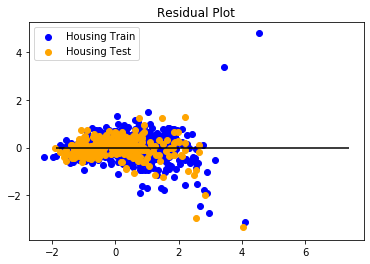

In [ ]:
# Make predictions using the X_test_scaled data
# Plot y_test_scaled vs y_test_scaled
# Scatter plot y_test_scaled vs predictions

### BEGIN SOLUTION
predictions = regression.predict(X_test_scaled)
regression.fit(X_train_scaled, y_train_scaled)
plt.scatter(regression.predict(X_train_scaled), regression.predict(X_train_scaled) - y_train_scaled, c="blue", label="Housing Train")
plt.scatter(regression.predict(X_test_scaled), regression.predict(X_test_scaled) - y_test_scaled, c="orange", label="Housing Test")
plt.legend()
plt.hlines(y=0, xmin=y_test_scaled.min(), xmax=y_test_scaled.max())
plt.title("Residual Plot")
plt.show()
### END SOLUTION

In [ ]:
neighborhoods = housing.groupby('Neighborhood',as_index=False)['SalePrice'].mean()\
.sort_values(by='SalePrice',ascending=False)\
.reset_index(drop=True)

In [ ]:
# plot the dataset, referencing dataframe column names
import altair as alt
alt.Chart(neighborhoods).mark_bar().encode(
  x='SalePrice',
  y=alt.Y('Neighborhood', sort='-x'),
  color='Neighborhood',   
)

alt.Chart(...)

In [ ]:
### BEGIN SOLUTION
from sklearn.metrics import mean_squared_error

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = model.score(X_test_scaled, y_test_scaled)
### END SOLUTION

print(f"MSE: {MSE}, R2: {r2}")

ImportError: ignored

In [ ]:
# LASSO model
# Note: Use an alpha of .01 when creating the model for this activity
from sklearn.linear_model import Lasso

### BEGIN SOLUTION
lasso = Lasso(alpha=.01).fit(X_train_scaled, y_train_scaled)

predictions = lasso.predict(X_test_scaled)

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = lasso.score(X_test_scaled, y_test_scaled)
### END SOLUTION

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.17591024303201777, R2: 0.847540004230035


In [ ]:
# Ridge model
# Note: Use an alpha of .01 when creating the model for this activity
from sklearn.linear_model import Ridge

### BEGIN SOLUTION
ridge = Ridge(alpha=.01).fit(X_train_scaled, y_train_scaled)

predictions = ridge.predict(X_test_scaled)

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = ridge.score(X_test_scaled, y_test_scaled)
### END SOLUTION

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.17511395178476702, R2: 0.8482301434629471


In [ ]:
# ElasticNet model
# Note: Use an alpha of .01 when creating the model for this activity
from sklearn.linear_model import ElasticNet

### BEGIN SOLUTION
elasticnet = ElasticNet(alpha=.01).fit(X_train_scaled, y_train_scaled)

predictions = elasticnet.predict(X_test_scaled)

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = elasticnet.score(X_test_scaled, y_test_scaled)
### END SOLUTION

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.17493480134610473, R2: 0.8483854117102638


In [ ]:
basement = housing[['BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF']]
basement_matrix = basement.corr()
basement_matrix 

,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF
BsmtFinSF1,1.000000,-0.050117,-0.495251,0.522396
BsmtFinSF2,-0.050117,1.000000,-0.209294,0.104810
BsmtUnfSF,-0.495251,-0.209294,1.000000,0.415360
TotalBsmtSF,0.522396,0.104810,0.415360,1.000000


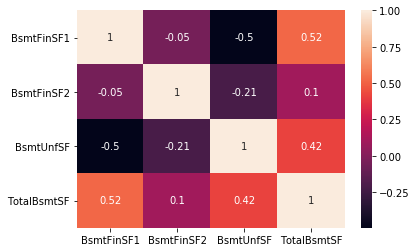

In [ ]:
import seaborn as sn
sn.heatmap(basement_matrix, annot=True)

In [ ]:
garage = housing[['GarageCars', 'GarageArea', 'GarageYrBlt']]
garage_matrix = garage.corr()
garage_matrix

,GarageCars,GarageArea,GarageYrBlt
GarageCars,1.000000,0.882475,0.598005
GarageArea,0.882475,1.000000,0.560783
GarageYrBlt,0.598005,0.560783,1.000000


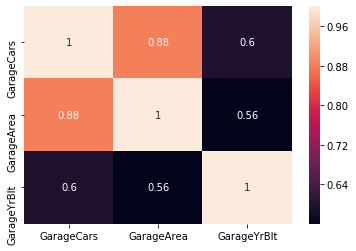

In [ ]:
sn.heatmap(garage_matrix, annot=True)

In [ ]:
building = housing[['OverallQual', 'YearBuilt', 'YearRemodAdd', 'OverallCond', 'MSSubClass']]
building_matrix = building.corr()
building_matrix

,OverallQual,YearBuilt,YearRemodAdd,OverallCond,MSSubClass
OverallQual,1.000000,0.572323,0.550684,-0.091932,0.032628
YearBuilt,0.572323,1.000000,0.592855,-0.375983,0.027850
YearRemodAdd,0.550684,0.592855,1.000000,0.073741,0.040581
OverallCond,-0.091932,-0.375983,0.073741,1.000000,-0.059316
MSSubClass,0.032628,0.027850,0.040581,-0.059316,1.000000


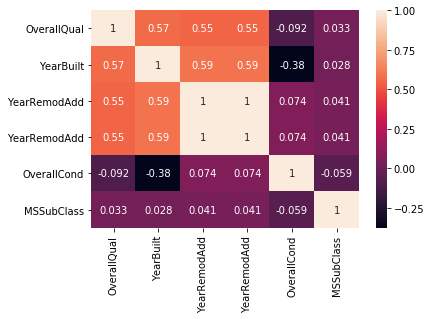

In [ ]:
sn.heatmap(building_matrix, annot=True)

In [ ]:
interior = housing[['GrLivArea', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF']]
interior_matrix = interior.corr()
interior_matrix

,GrLivArea,1stFlrSF,2ndFlrSF,LowQualFinSF
GrLivArea,1.000000,0.566024,0.687501,0.134683
1stFlrSF,0.566024,1.000000,-0.202646,-0.014241
2ndFlrSF,0.687501,-0.202646,1.000000,0.063353
LowQualFinSF,0.134683,-0.014241,0.063353,1.000000


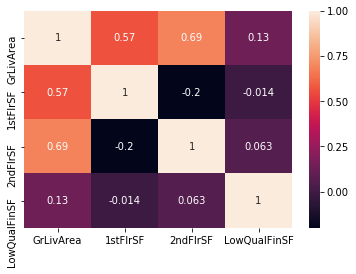

In [ ]:
sn.heatmap(interior_matrix, annot=True)

In [ ]:
rooms = housing[['FullBath', 'TotRmsAbvGrd', 'HalfBath', 'BsmtFullBath', 'BedroomAbvGr', 'BsmtHalfBath', 'KitchenAbvGr']]
rooms_matrix = rooms.corr()
rooms_matrix

,FullBath,TotRmsAbvGrd,HalfBath,BsmtFullBath,BedroomAbvGr,BsmtHalfBath,KitchenAbvGr
FullBath,1.000000,0.554784,0.136381,-0.064512,0.363252,-0.054536,0.133115
TotRmsAbvGrd,0.554784,1.000000,0.343415,-0.053275,0.676620,-0.023836,0.256045
HalfBath,0.136381,0.343415,1.000000,-0.030905,0.226651,-0.012340,-0.068263
BsmtFullBath,-0.064512,-0.053275,-0.030905,1.000000,-0.150673,-0.147871,-0.041503
BedroomAbvGr,0.363252,0.676620,0.226651,-0.150673,1.000000,0.046519,0.198597
BsmtHalfBath,-0.054536,-0.023836,-0.012340,-0.147871,0.046519,1.000000,-0.037944
KitchenAbvGr,0.133115,0.256045,-0.068263,-0.041503,0.198597,-0.037944,1.000000


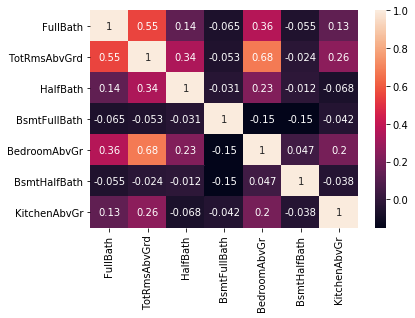

In [ ]:
sn.heatmap(rooms_matrix, annot=True)

In [ ]:
lot = housing[["LotArea","LotFrontage"]]
lot_matrix = lot.corr()
lot_matrix

,LotArea,LotFrontage
LotArea,1.000000,0.100739
LotFrontage,0.100739,1.000000


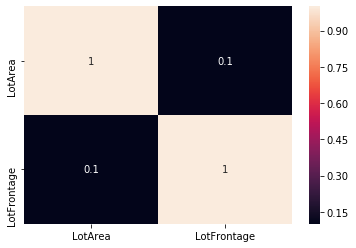

In [ ]:
sn.heatmap(lot_matrix, annot=True)

In [ ]:
exterior = housing[["WoodDeckSF", "OpenPorchSF","ScreenPorch","PoolArea", "3SsnPorch","EnclosedPorch"]]
exterior_matrix = exterior.corr()
exterior_matrix

,WoodDeckSF,OpenPorchSF,ScreenPorch,PoolArea,3SsnPorch,EnclosedPorch
WoodDeckSF,1.000000,0.058661,-0.074181,0.073378,-0.032771,-0.125989
OpenPorchSF,0.058661,1.000000,0.074304,0.060762,-0.005842,-0.093079
ScreenPorch,-0.074181,0.074304,1.000000,0.051307,-0.031436,-0.082864
PoolArea,0.073378,0.060762,0.051307,1.000000,-0.007992,0.054203
3SsnPorch,-0.032771,-0.005842,-0.031436,-0.007992,1.000000,-0.037305
EnclosedPorch,-0.125989,-0.093079,-0.082864,0.054203,-0.037305,1.000000


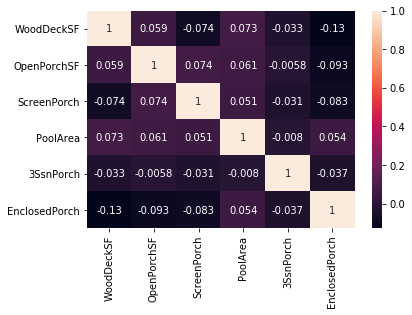

In [ ]:
sn.heatmap(exterior_matrix, annot=True)

In [ ]:
corr_data[1:20]

,index,SalePrice
1,OverallQual,0.790982
2,GrLivArea,0.708624
3,GarageCars,0.640409
4,GarageArea,0.623431
5,TotalBsmtSF,0.613581
6,1stFlrSF,0.605852
7,FullBath,0.560664
8,TotRmsAbvGrd,0.533723
9,YearBuilt,0.522897
10,YearRemodAdd,0.507101


In [ ]:
# load an example dataset
from vega_datasets import data
cars = data.cars()

# plot the dataset, referencing dataframe column names
import altair as alt
alt.Chart(cars).mark_bar().encode(
  x='mean(Miles_per_Gallon)',
  y='Origin',
  color='Origin'
)